In [7]:
#importing all the required libraries
import mysql.connector

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install mysql-connector-python

In [9]:
import mysql.connector

In [10]:
con=mysql.connector.connect(
host="localhost",
port=3306,
user="root",
password="Seagate",
database="studentmarks")

In [4]:
import pandas as pd

df=pd.read_sql_query('Select * from student_marks',con,parse_dates=['dteday'])
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Name,Gende,None,0,0,0,0,0,0,0,0
1,John,M,None,55,45,56,87,21,52,89,65
2,Suresh,M,None,75,96,78,64,90,61,58,2
3,Ramesh,M,None,25,54,89,76,95,87,56,74
4,Jessica,F,None,78,96,86,63,54,89,75,45
5,Jennifer,F,None,58,96,78,46,96,77,83,53
6,Annu,F,None,45,87,52,89,55,89,87,52
7,pooja,F,None,55,64,61,58,75,58,64,61
8,Ritesh,M,None,54,76,87,56,25,56,76,87
9,Farha,F,None,55,63,89,75,78,75,63,89


In [5]:
#deleting the zeroth row,
df.drop(0,axis=0, inplace=True)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,John,M,None,55,45,56,87,21,52,89,65
2,Suresh,M,None,75,96,78,64,90,61,58,2
3,Ramesh,M,None,25,54,89,76,95,87,56,74
4,Jessica,F,None,78,96,86,63,54,89,75,45
5,Jennifer,F,None,58,96,78,46,96,77,83,53
6,Annu,F,None,45,87,52,89,55,89,87,52
7,pooja,F,None,55,64,61,58,75,58,64,61
8,Ritesh,M,None,54,76,87,56,25,56,76,87
9,Farha,F,None,55,63,89,75,78,75,63,89
10,Mukesh,M,None,96,46,77,83,58,83,46,77


In [11]:
# checking shape
df.shape

(10, 11)

In [12]:
# checking data type of all columns
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [14]:
#checkings columns
df.keys()

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [13]:
# checking null value
df.isnull().sum()

Name          0
Gender        0
DOB          10
Maths         0
Physics       0
Chemistry     0
English       0
Biology       0
Economics     0
History       0
Civics        0
dtype: int64

In [16]:
# adding total marks and percentage obtained column
df['Total'] = df[['Maths','Physics','Chemistry','English','Biology','Economics','History','Civics']].sum(axis=1)
df['Percentage'] = (df['Total']*100)/800
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,John,M,None,55,45,56,87,21,52,89,65,470,58.750
2,Suresh,M,None,75,96,78,64,90,61,58,2,524,65.500
3,Ramesh,M,None,25,54,89,76,95,87,56,74,556,69.500
4,Jessica,F,None,78,96,86,63,54,89,75,45,586,73.250
5,Jennifer,F,None,58,96,78,46,96,77,83,53,587,73.375
6,Annu,F,None,45,87,52,89,55,89,87,52,556,69.500
7,pooja,F,None,55,64,61,58,75,58,64,61,496,62.000
8,Ritesh,M,None,54,76,87,56,25,56,76,87,517,64.625
9,Farha,F,None,55,63,89,75,78,75,63,89,587,73.375
10,Mukesh,M,None,96,46,77,83,58,83,46,77,566,70.750


In [17]:
#summary statictcis
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000,10.000000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,544.50000,68.062500
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,41.01558,5.126947
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,470.00000,58.750000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,518.75000,64.843750
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,556.00000,69.500000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,581.00000,72.625000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,587.00000,73.375000


In [19]:
#optaining only Maths Marks alone.
df.Maths

1     55
2     75
3     25
4     78
5     58
6     45
7     55
8     54
9     55
10    96
Name: Maths, dtype: int64

In [50]:
##droping the DOB & Name coloum
df1=df
df1=df1.drop(['DOB','Name'], axis=1)
df1

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,M,55,45,56,87,21,52,89,65,470,58.750
2,M,75,96,78,64,90,61,58,2,524,65.500
3,M,25,54,89,76,95,87,56,74,556,69.500
4,F,78,96,86,63,54,89,75,45,586,73.250
5,F,58,96,78,46,96,77,83,53,587,73.375
6,F,45,87,52,89,55,89,87,52,556,69.500
7,F,55,64,61,58,75,58,64,61,496,62.000
8,M,54,76,87,56,25,56,76,87,517,64.625
9,F,55,63,89,75,78,75,63,89,587,73.375
10,M,96,46,77,83,58,83,46,77,566,70.750


In [51]:
# co-relation between coloums
df.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629,0.156049,0.156049
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266,0.372033,0.372033
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908,0.545944,0.545944
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705,-0.132607,-0.132607
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060,0.489008,0.489008
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905,0.830433,0.830433
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686,-0.199145,-0.199145
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000,0.082574,0.082574
Total,0.156049,0.372033,0.545944,-0.132607,0.489008,0.830433,-0.199145,0.082574,1.000000,1.000000
Percentage,0.156049,0.372033,0.545944,-0.132607,0.489008,0.830433,-0.199145,0.082574,1.000000,1.000000


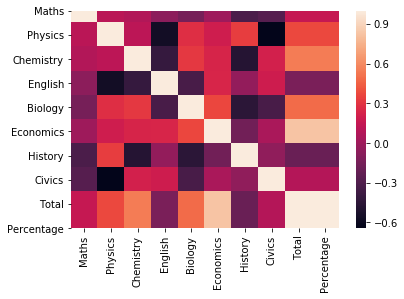

In [52]:
# heat map of corelation
sns.heatmap(df.corr())

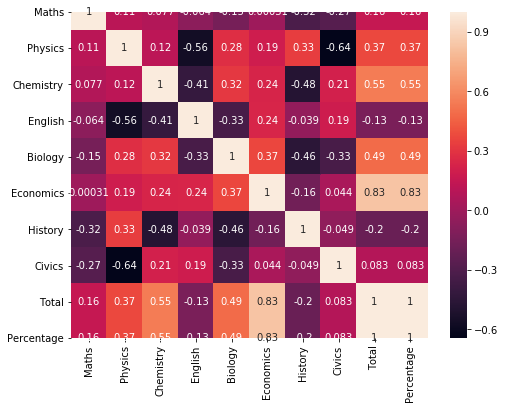

In [53]:
corr_hmap=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_hmap,annot=True)
plt.show()

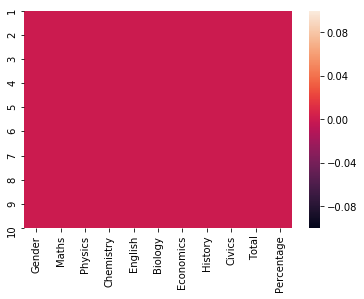

In [54]:
#after dropping the DOB Column will check the null values
sns.heatmap(df1.isnull())

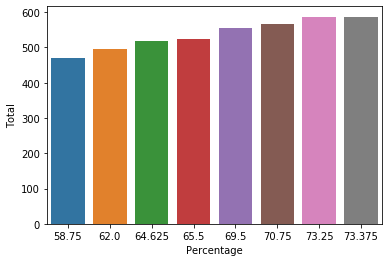

In [55]:
#Average difference percentage grouped by total

sns.barplot( data=df, x="Percentage",y="Total")
plt.show()

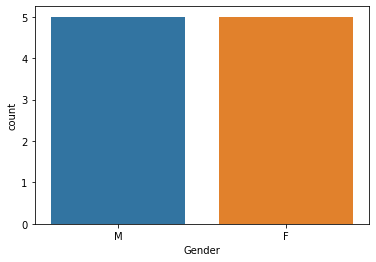

In [56]:
#comparing the number of manle and female
sns.countplot(x=df['Gender'],data=df)

Maths            AxesSubplot(0.125,0.657941;0.168478x0.222059)
Physics       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Chemistry     AxesSubplot(0.529348,0.657941;0.168478x0.222059)
English       AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Biology          AxesSubplot(0.125,0.391471;0.168478x0.222059)
Economics     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
History       AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Civics        AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Total               AxesSubplot(0.125,0.125;0.168478x0.222059)
Percentage       AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

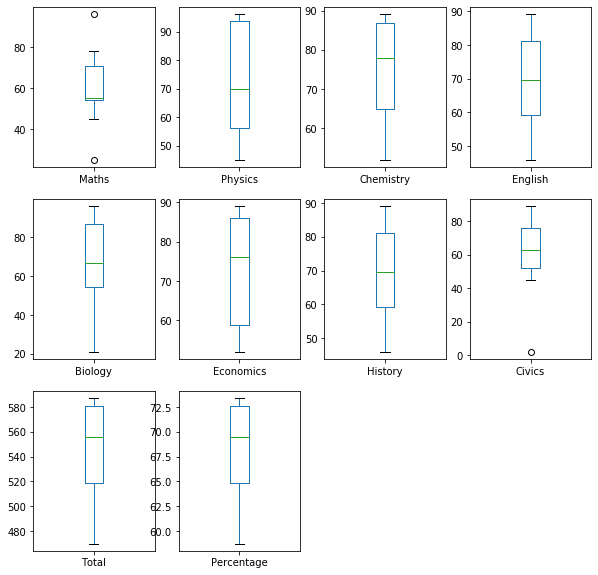

In [57]:
# using box plot to visualize the minmum, maximum, avarage and outlires
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

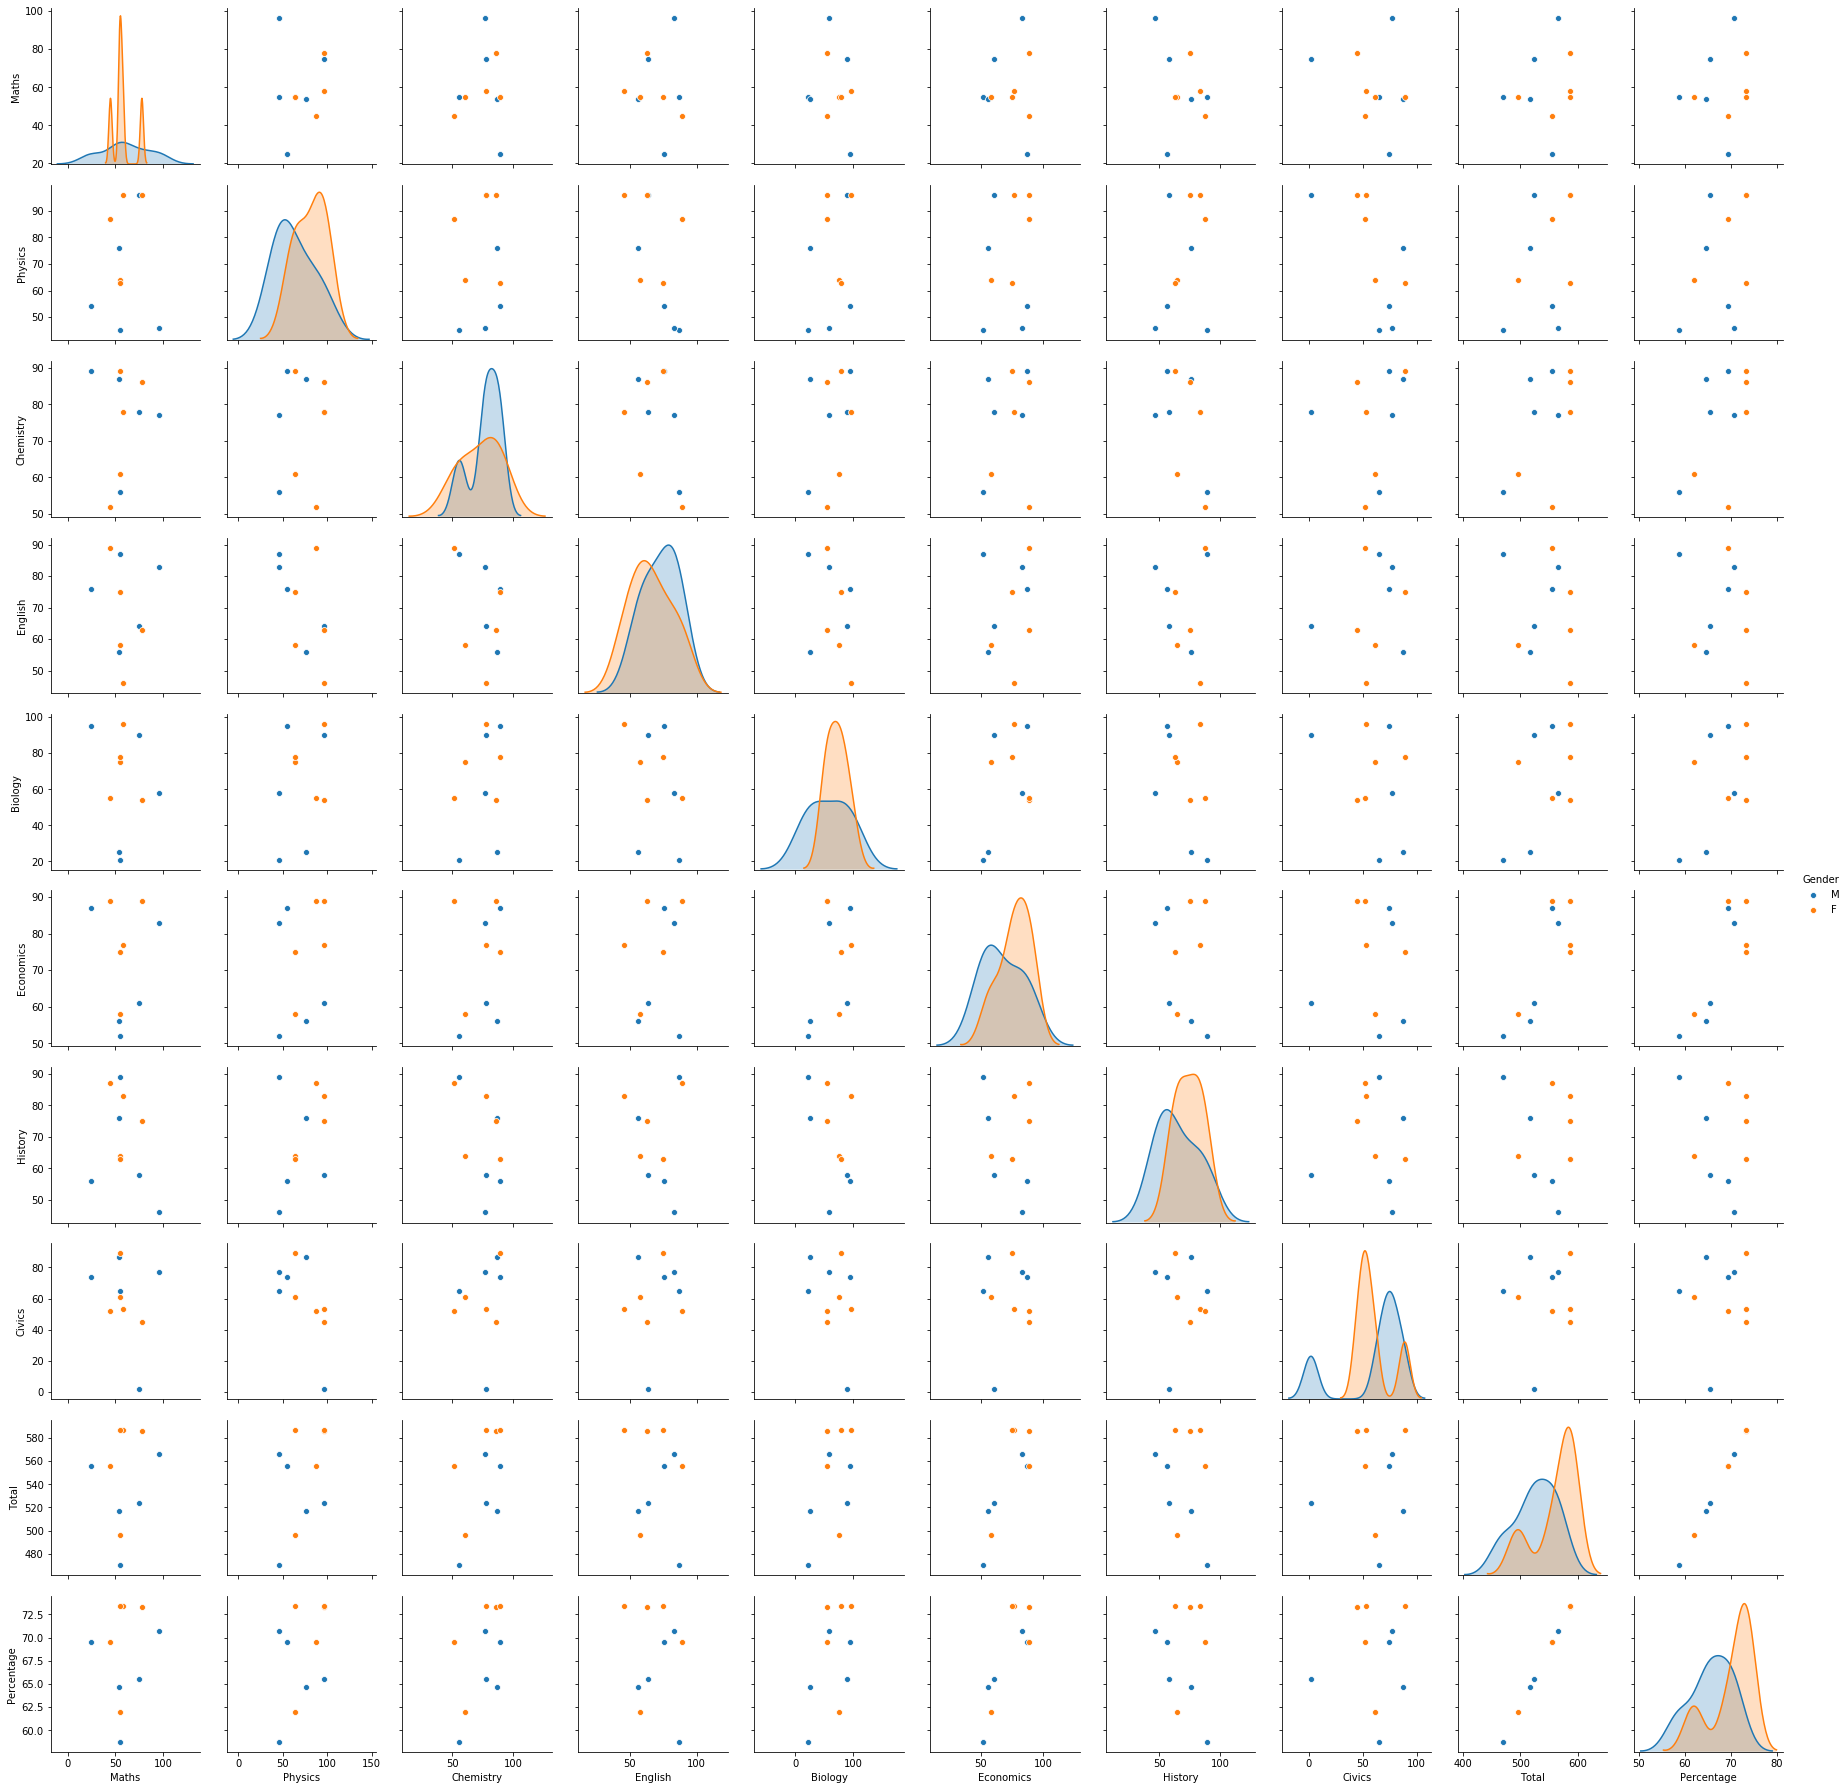

In [58]:
# pair plot to see the scatter of data using gender as hue for clear understanding
sns.pairplot(df1, hue='Gender')

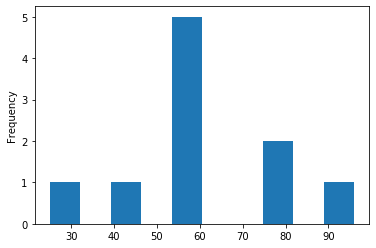

In [59]:
#Histogram representation of Maths marks. 

df['Maths'].plot.hist()

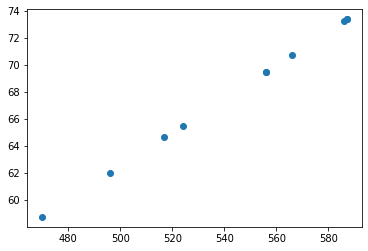

In [73]:
plt.scatter(df['Total'],df['Percentage'])
plt.show()

In [64]:
# using Label Encoding for converting the gender labels into numeric form
le=LabelEncoder()
df1['Gender']=le.fit_transform(df1['Gender'])
df1

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,1,55,45,56,87,21,52,89,65,470,58.750
2,1,75,96,78,64,90,61,58,2,524,65.500
3,1,25,54,89,76,95,87,56,74,556,69.500
4,0,78,96,86,63,54,89,75,45,586,73.250
5,0,58,96,78,46,96,77,83,53,587,73.375
6,0,45,87,52,89,55,89,87,52,556,69.500
7,0,55,64,61,58,75,58,64,61,496,62.000
8,1,54,76,87,56,25,56,76,87,517,64.625
9,0,55,63,89,75,78,75,63,89,587,73.375
10,1,96,46,77,83,58,83,46,77,566,70.750


In [65]:
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,John,M,None,55,45,56,87,21,52,89,65,470,58.750
2,Suresh,M,None,75,96,78,64,90,61,58,2,524,65.500
3,Ramesh,M,None,25,54,89,76,95,87,56,74,556,69.500
4,Jessica,F,None,78,96,86,63,54,89,75,45,586,73.250
5,Jennifer,F,None,58,96,78,46,96,77,83,53,587,73.375
6,Annu,F,None,45,87,52,89,55,89,87,52,556,69.500
7,pooja,F,None,55,64,61,58,75,58,64,61,496,62.000
8,Ritesh,M,None,54,76,87,56,25,56,76,87,517,64.625
9,Farha,F,None,55,63,89,75,78,75,63,89,587,73.375
10,Mukesh,M,None,96,46,77,83,58,83,46,77,566,70.750


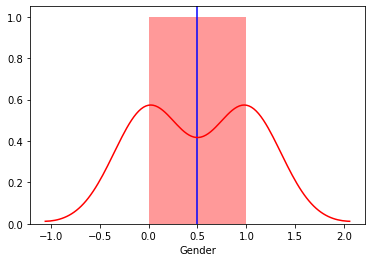

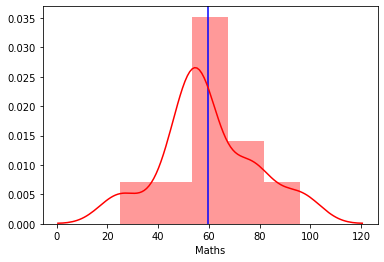

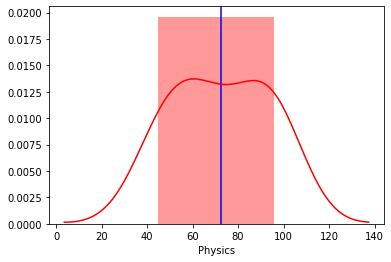

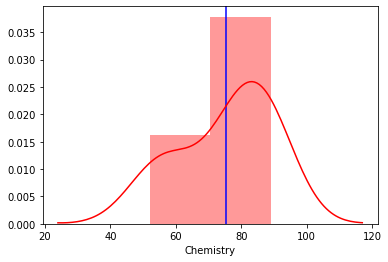

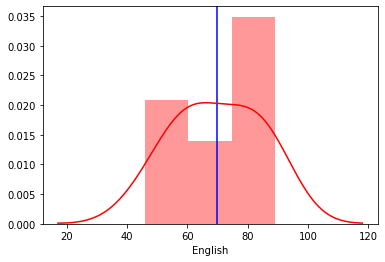

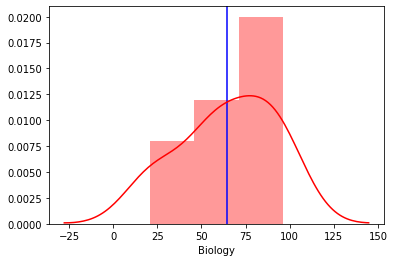

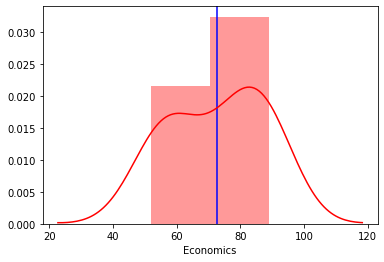

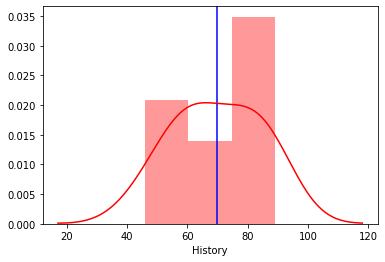

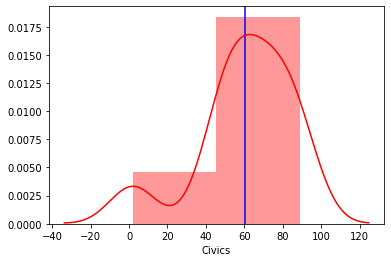

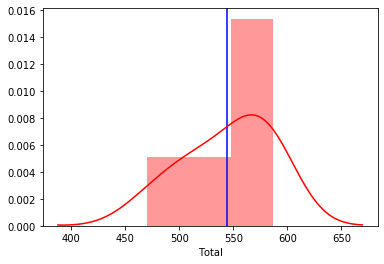

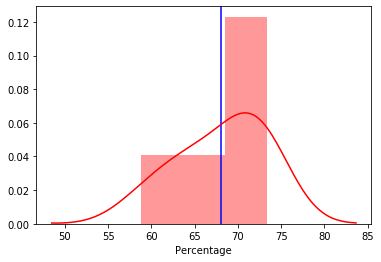

In [70]:
# Histogram - Distribution plot for all variables
for i,col in enumerate(df1):
    plt.figure(i)
    plt.axvline(df1[col].mean(),color = 'B')
    sns.distplot(df1[col],color='red')

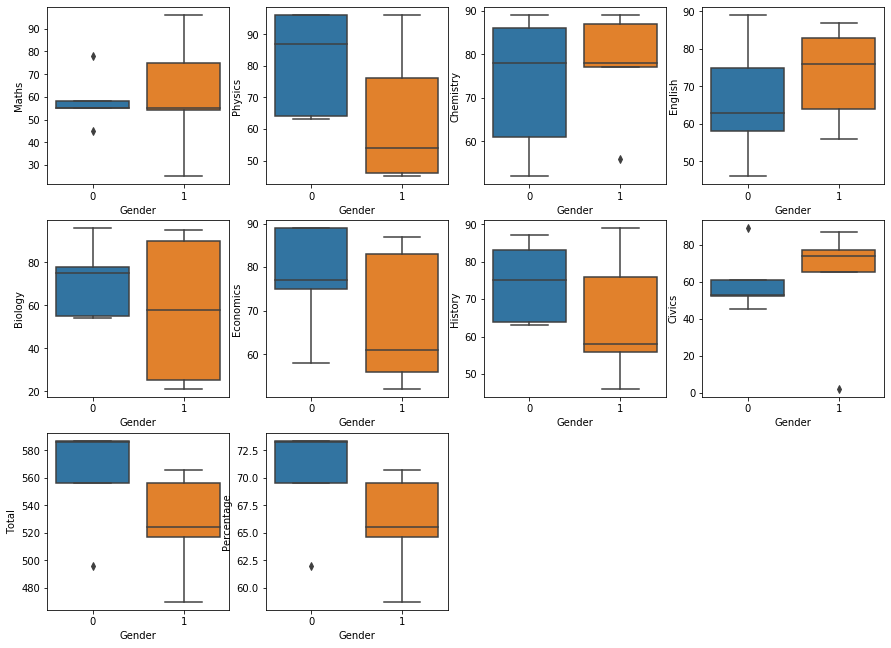

In [71]:
#creating box plot for each subject with respect to gender
figure(num=None, figsize=(15,15))
for column_index, column in enumerate(df1.columns):
    if column == 'Gender':
        continue
    plt.subplot(4, 4, column_index)
    sns.boxplot(x='Gender', y=column, data=df1)

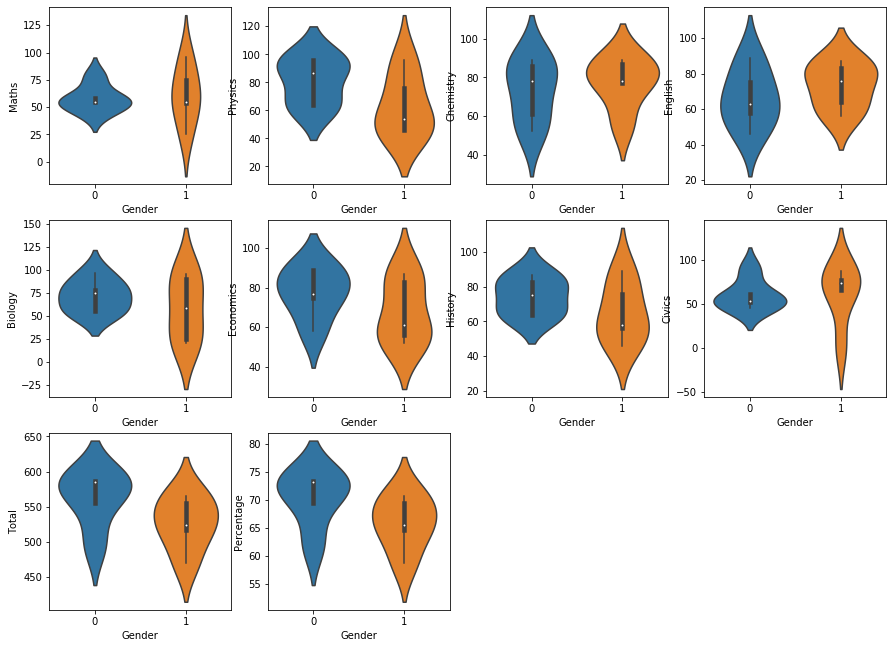

In [72]:
#creating violin plot for each subject with respect to gender
figure(num=None, figsize=(15,15))
for column_index, column in enumerate(df1.columns):
    if column == 'Gender':
        continue
    plt.subplot(4, 4, column_index)
    sns.violinplot(x='Gender', y=column, data=df1)

In [74]:
df1

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,1,55,45,56,87,21,52,89,65,470,58.750
2,1,75,96,78,64,90,61,58,2,524,65.500
3,1,25,54,89,76,95,87,56,74,556,69.500
4,0,78,96,86,63,54,89,75,45,586,73.250
5,0,58,96,78,46,96,77,83,53,587,73.375
6,0,45,87,52,89,55,89,87,52,556,69.500
7,0,55,64,61,58,75,58,64,61,496,62.000
8,1,54,76,87,56,25,56,76,87,517,64.625
9,0,55,63,89,75,78,75,63,89,587,73.375
10,1,96,46,77,83,58,83,46,77,566,70.750


In [75]:
df1.skew()

Gender        0.000000
Maths         0.246964
Physics      -0.045336
Chemistry    -0.746462
English      -0.131222
Biology      -0.496446
Economics    -0.245555
History      -0.131222
Civics       -1.332448
Total        -0.642123
Percentage   -0.642123
dtype: float64

In [77]:
#using loc function for removing skewness 
#by using log
import numpy as np
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [80]:
df1.skew()

Gender        0.000000
Maths         0.246964
Physics      -0.045336
Chemistry    -0.746462
English      -0.131222
Biology      -0.496446
Economics    -0.245555
History      -0.131222
Civics       -1.332448
Total        -0.642123
Percentage   -0.642123
dtype: float64

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
print(df1.shape)
z

(10, 11)


array([[1.        , 0.24916243, 1.39276651, 1.45310069, 1.26169862,
        1.70618534, 1.49152635, 1.40755973, 0.18716723, 1.91463575,
        1.91463575],
       [1.        , 0.83415247, 1.20910499, 0.20328352, 0.41570417,
        0.98779152, 0.84303663, 0.85328751, 2.43317398, 0.52684608,
        0.52684608],
       [1.        , 1.87413478, 0.93361271, 1.03147562, 0.4594625 ,
        1.18300723, 1.03037811, 0.99914862, 0.56150169, 0.2955478 ,
        0.2955478 ],
       [1.        , 0.99664971, 1.20910499, 0.80560505, 0.48863473,
        0.41776163, 1.17448693, 0.38653195, 0.64468712, 1.06654206,
        1.06654206],
       [1.        , 0.08666519, 1.20910499, 0.20328352, 1.72845418,
        1.22205037, 0.30983398, 0.9699764 , 0.31194538, 1.09224187,
        1.09224187],
       [1.        , 0.79081988, 0.7499512 , 1.75426145, 1.40755973,
        0.37871849, 1.17448693, 1.26169862, 0.3535381 , 0.2955478 ,
        0.2955478 ],
       [1.        , 0.24916243, 0.42344183, 1.07664973, 0.

In [93]:
threshold=3
print(np.where(z>3))
z

(array([], dtype=int64), array([], dtype=int64))


array([[1.        , 0.24916243, 1.39276651, 1.45310069, 1.26169862,
        1.70618534, 1.49152635, 1.40755973, 0.18716723, 1.91463575,
        1.91463575],
       [1.        , 0.83415247, 1.20910499, 0.20328352, 0.41570417,
        0.98779152, 0.84303663, 0.85328751, 2.43317398, 0.52684608,
        0.52684608],
       [1.        , 1.87413478, 0.93361271, 1.03147562, 0.4594625 ,
        1.18300723, 1.03037811, 0.99914862, 0.56150169, 0.2955478 ,
        0.2955478 ],
       [1.        , 0.99664971, 1.20910499, 0.80560505, 0.48863473,
        0.41776163, 1.17448693, 0.38653195, 0.64468712, 1.06654206,
        1.06654206],
       [1.        , 0.08666519, 1.20910499, 0.20328352, 1.72845418,
        1.22205037, 0.30983398, 0.9699764 , 0.31194538, 1.09224187,
        1.09224187],
       [1.        , 0.79081988, 0.7499512 , 1.75426145, 1.40755973,
        0.37871849, 1.17448693, 1.26169862, 0.3535381 , 0.2955478 ,
        0.2955478 ],
       [1.        , 0.24916243, 0.42344183, 1.07664973, 0.

In [95]:
df1new=df1[(z<3).all(axis=1)]
df1new.shape

(10, 11)

In [101]:
df1

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,1,55,45,56,87,21,52,89,65,470,58.750
2,1,75,96,78,64,90,61,58,2,524,65.500
3,1,25,54,89,76,95,87,56,74,556,69.500
4,0,78,96,86,63,54,89,75,45,586,73.250
5,0,58,96,78,46,96,77,83,53,587,73.375
6,0,45,87,52,89,55,89,87,52,556,69.500
7,0,55,64,61,58,75,58,64,61,496,62.000
8,1,54,76,87,56,25,56,76,87,517,64.625
9,0,55,63,89,75,78,75,63,89,587,73.375
10,1,96,46,77,83,58,83,46,77,566,70.750


In [105]:

# last 5 numbers
df1.tail()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
6,0,45,87,52,89,55,89,87,52,556,69.500
7,0,55,64,61,58,75,58,64,61,496,62.000
8,1,54,76,87,56,25,56,76,87,517,64.625
9,0,55,63,89,75,78,75,63,89,587,73.375
10,1,96,46,77,83,58,83,46,77,566,70.750


In [106]:
#first 5 numbers
df1.head()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,1,55,45,56,87,21,52,89,65,470,58.750
2,1,75,96,78,64,90,61,58,2,524,65.500
3,1,25,54,89,76,95,87,56,74,556,69.500
4,0,78,96,86,63,54,89,75,45,586,73.250
5,0,58,96,78,46,96,77,83,53,587,73.375


In [111]:
#Bottom 3 student of class
print('Bottom 2 student of class:')
df1.nsmallest(2, ['Total'])

Bottom 2 student of class:


,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
1,1,55,45,56,87,21,52,89,65,470,58.75
7,0,55,64,61,58,75,58,64,61,496,62.00


In [120]:
subjects=df.drop(['Name','DOB','Gender'], axis=1)
print('Highest marks obtained in each subject \n',subjects.max())

Highest marks obtained in each subject 
 Maths          96.000
Physics        96.000
Chemistry      89.000
English        89.000
Biology        96.000
Economics      89.000
History        89.000
Civics         89.000
Total         587.000
Percentage     73.375
dtype: float64


In [122]:
print('least marks obtained in each subject:\n',subjects.min())

least marks obtained in each subject:
 Maths          25.00
Physics        45.00
Chemistry      52.00
English        46.00
Biology        21.00
Economics      52.00
History        46.00
Civics          2.00
Total         470.00
Percentage     58.75
dtype: float64


In [124]:
#Let it be save complete model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(df, 'df.pkl')

['df.pkl']